In [107]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [66]:
df = pd.read_json('sarcasm.json', lines=True)
sentences = np.array(df["headline"])
sarcasm = np.array(df["is_sarcastic"])
url = np.array(df["article_link"])

print(len(sentences))

26709


In [84]:
training_size = 20000

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = sarcasm[:training_size]
testing_labels = sarcasm[training_size:]

In [109]:
vocab_size = 3000
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

max_length = 100
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
training_padded = pad_sequences(training_sequences, padding = "post", maxlen = max_length)
testing_padded = pad_sequences(testing_sequences, padding = "post", maxlen = max_length)

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 30, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [114]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 1)


Epoch 1/100
625/625 [==============================] - 1s 879us/step - loss: 0.6573 - accuracy: 0.6017 - val_loss: 0.5777 - val_accuracy: 0.7611
Epoch 2/100
625/625 [==============================] - 1s 806us/step - loss: 0.4434 - accuracy: 0.8141 - val_loss: 0.3980 - val_accuracy: 0.8302
Epoch 3/100
625/625 [==============================] - 1s 855us/step - loss: 0.3505 - accuracy: 0.8508 - val_loss: 0.3714 - val_accuracy: 0.8351
Epoch 4/100
625/625 [==============================] - 1s 1ms/step - loss: 0.3155 - accuracy: 0.8642 - val_loss: 0.3639 - val_accuracy: 0.8438
Epoch 5/100
625/625 [==============================] - 0s 788us/step - loss: 0.2958 - accuracy: 0.8747 - val_loss: 0.3602 - val_accuracy: 0.8436
Epoch 6/100
625/625 [==============================] - 1s 855us/step - loss: 0.2841 - accuracy: 0.8770 - val_loss: 0.3728 - val_accuracy: 0.8389
Epoch 7/100
625/625 [==============================] - 1s 870us/step - loss: 0.2722 - accuracy: 0.8845 - val_loss: 0.3668 - val_accu

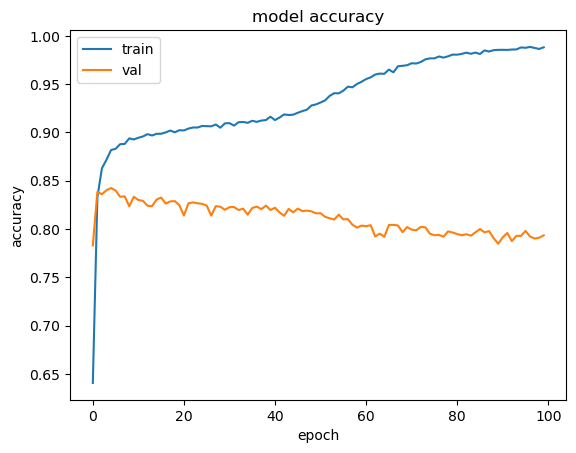

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()